In [2]:
import pandas as pd

#读取数据
train = pd.read_csv(r'./train.csv')
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
#数据处理,将时间设置为DATETIME形，并设置为索引

train['Datetime'] = pd.to_datetime(train.Datetime,format=('%d-%m-%Y %H:%M'))
train.index = train.Datetime
print(train.head())

                     ID            Datetime  Count
Datetime                                          
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2


In [4]:
#删除Datetime列 
train.drop(['Datetime','ID'],axis = 1,inplace = True)  #删除的列直接写列名，有axis表示横向还是纵向，沿着轴去找这个列名。如果写df['列名']得到的是列的值，则会沿着这一列的值去与轴上匹配，则会报错
train.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [5]:
#按照天进行采样
daily_train = train.resample('D').sum()
# print(daily_train.head())
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis = 1,inplace = True)
print(daily_train.head())

                   ds   y
Datetime                 
2012-08-25 2012-08-25  76
2012-08-26 2012-08-26  88
2012-08-27 2012-08-27  62
2012-08-28 2012-08-28  58
2012-08-29 2012-08-29  60


In [8]:
from fbprophet import Prophet
#拟合prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)
#预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)
print(forecast)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -692.724556  -2304.035467     68.035513   -692.724556   
1   2012-08-26   -684.600647  -2382.442472   -148.266421   -684.600647   
2   2012-08-27   -676.476738   -913.405251   1522.666733   -676.476738   
3   2012-08-28   -668.352829   -810.247291   1621.050899   -668.352829   
4   2012-08-29   -660.228920   -711.057593   1669.119016   -660.228920   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16215.954450  15191.545089  17715.910041  15775.903376   
971 2015-04-23  16243.372814  15026.723600  17553.529931  15801.337154   
972 2015-04-24  16270.791178  14773.303953  17275.260792  15826.805836   
973 2015-04-25  16298.209541  13600.864960  16231.078605  15849.747630   
974 2015-04-26  16325.627905  13439.289519  16017.757348  15872.474176   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -692.724556     -420.456

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline  

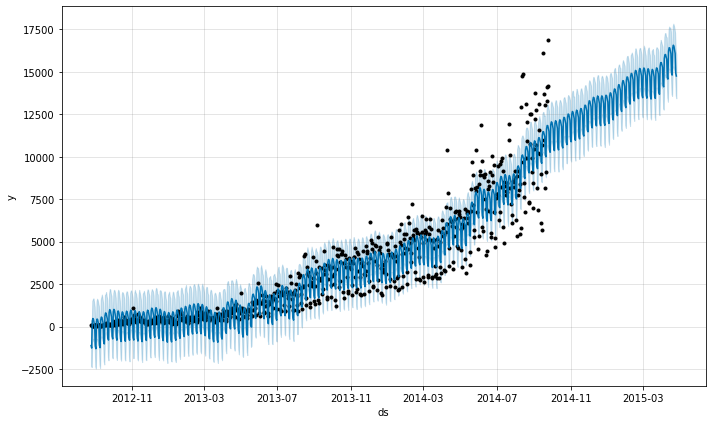

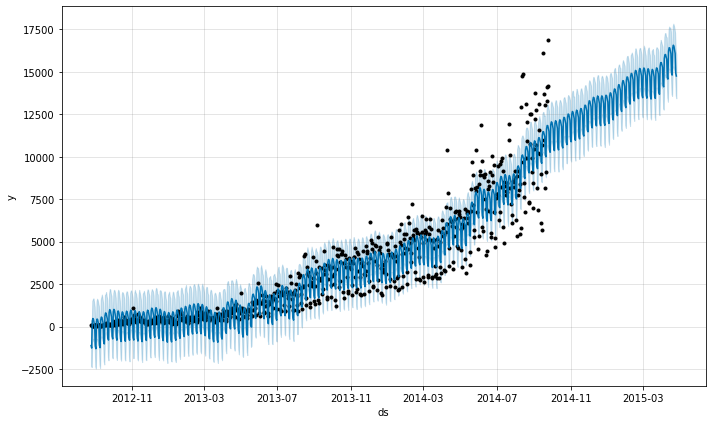

In [9]:
m.plot(forecast)

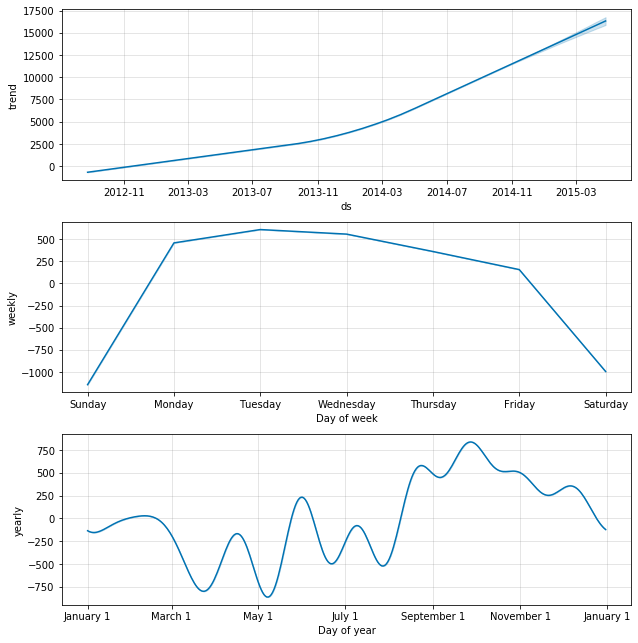

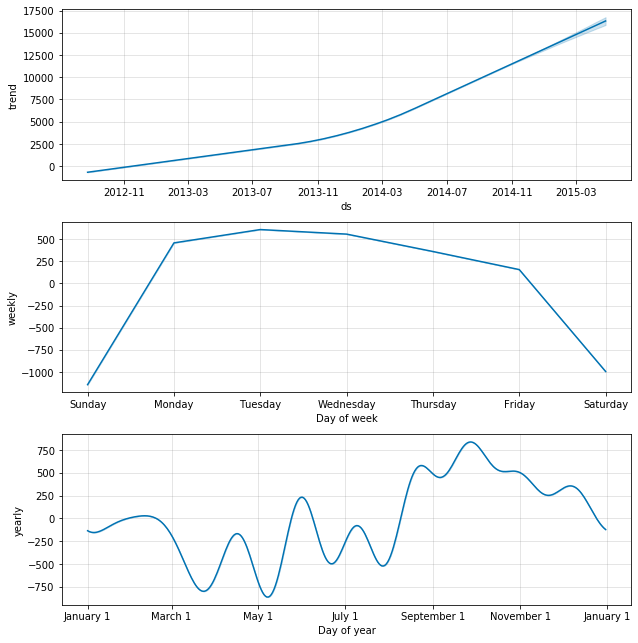

In [11]:
m.plot_components(forecast)